In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 'scrapy.cfg',
 "What's On Netflix Data Analysis.ipynb",
 'whatsonnetflix',
 'whatsonnetflixmovies.csv']

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime 


In [3]:
df = pd.read_csv('whatsonnetflixmovies.csv')

In [4]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df['date'].dt.to_period('M')
df

,Foreign_or_Domestic,IMDB_score,Netflix_Original,TV_or_Movie,date,genre,language,title,year,month_year
0,foreign,7.4,NaN,movie,2020-04-20,"Comedy, Drama, Fantasy, Thriller",Arabic,1000 Mabrouk,2009.0,2020-04
1,foreign,NaN,NaN,movie,2020-04-20,Comedy,Arabic,Bittersweet,2010.0,2020-04
2,foreign,NaN,NaN,movie,2020-04-20,"Drama, Middle-east",Arabic,Cairo Class,NaN,2020-04
3,foreign,7.2,Netflix Original,movie,2020-04-20,Documentary,English,"Coronavirus, Explained",NaN,2020-04
4,foreign,8.5,NaN,movie,2020-04-20,"Documentary, Biography",English,No Direction Home: Bob Dylan,2005.0,2020-04
...,...,...,...,...,...,...,...,...,...,...
2214,foreign,NaN,NaN,series,2019-04-29,Drama,Taiwanese,K.O. One Re-act,NaN,2019-04
2215,foreign,NaN,NaN,series,2019-04-29,Sci-fi,Mandarin,K.O.3an Guo,NaN,2019-04
2216,foreign,NaN,NaN,series,2019-04-29,Sci-fi,Mandarin,KO One Return,NaN,2019-04
2217,foreign,7.5,NaN,series,2019-04-29,Documentary,English,Perfect Bid: The Contestant Who Knew Too Much,2017.0,2019-04


IMDB_score    6.769557
dtype: float64


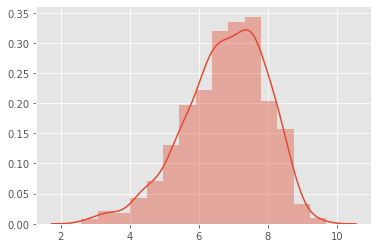

In [219]:
imdb = df[['IMDB_score']]
imdb = imdb.dropna(axis = 0, how = "any")
print(imdb.mean())
sns.distplot(imdb, bins=15)

year    2016.0
dtype: float64

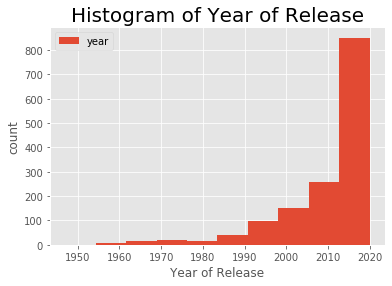

In [5]:
year = df[['year']]
year = year.dropna()
year.plot(kind = 'hist', bins = 10)
plt.xlabel('Year of Release')
plt.ylabel('count')
plt.title('Histogram of Year of Release', fontsize=20)
year.median()

Text(0, 0.5, 'count')

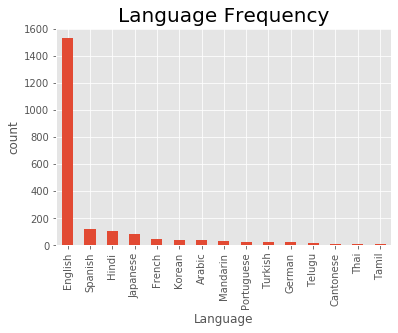

In [22]:
df.language.value_counts().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Language Frequency', fontsize=20)
plt.xlabel('Language')
plt.ylabel('count')

Text(0, 0.5, 'count')

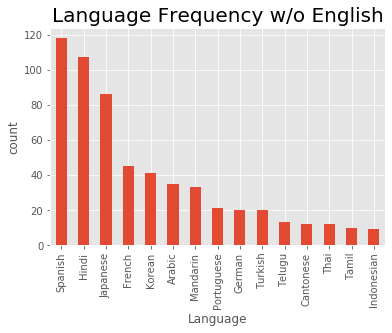

In [23]:
df_lang = df.loc[df['language'] != 'English']
df_lang.language.value_counts().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Language Frequency w/o English', fontsize=20)
plt.xlabel('Language')
plt.ylabel('count')

Text(0, 0.5, 'Number of Releases')

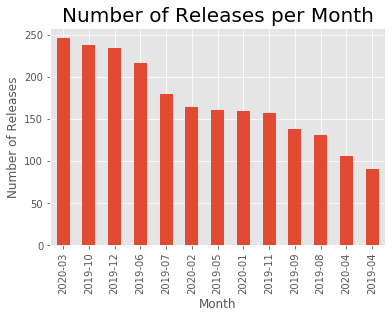

In [24]:
df.month_year.value_counts().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Number of Releases per Month', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Releases')

In [13]:
df_genres = df.copy()
df_genres = df_genres.dropna(subset = ['genre'])
df_genres.genre = df_genres.genre.apply(lambda x: x.split(','))

In [14]:
list_ = []
for index, item in enumerate(df_genres.genre):
    list_.extend(map(lambda x: [index, x], item))
Genres = pd.DataFrame(list_, columns=['index', 'genres'])

In [15]:
df_genres = pd.merge(df_genres.drop('genre', axis=1), Genres, how='right', left_index=True, right_on='index')
df_genres = df_genres.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_genres = df_genres.set_index("index")

Text(0, 0.5, 'Number of Releases')

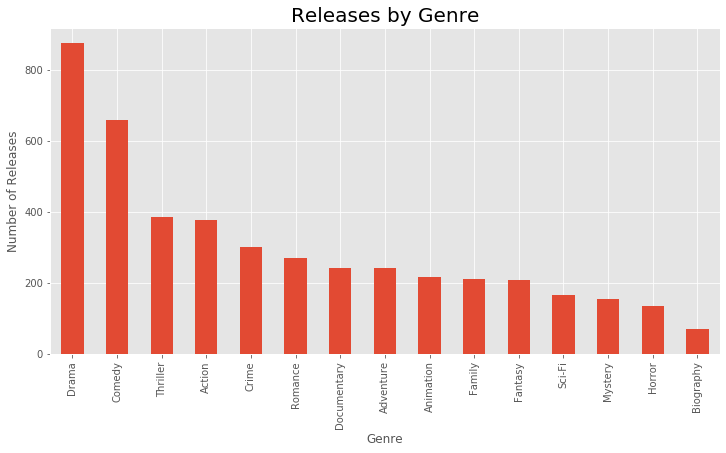

In [25]:
plt.figure(figsize=(12,6))
df_genres.genres.value_counts().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Releases by Genre', fontsize=20)
plt.xlabel('Genre')
plt.ylabel('Number of Releases')

In [17]:
df_drama = df_genres.loc[df_genres['genres'] == 'Drama']

Text(0, 0.5, 'Drama Releases')

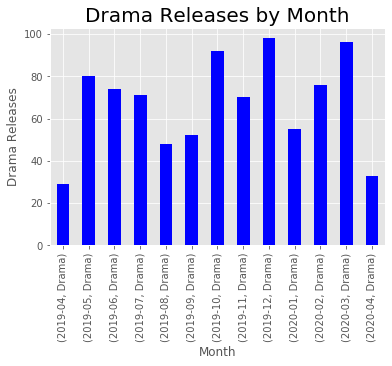

In [26]:
df_drama.groupby('month_year')['genres'].value_counts().head(15).plot(kind='bar', color ='b')
plt.title('Drama Releases by Month', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Drama Releases')

Text(0, 0.5, 'Number of Releases')

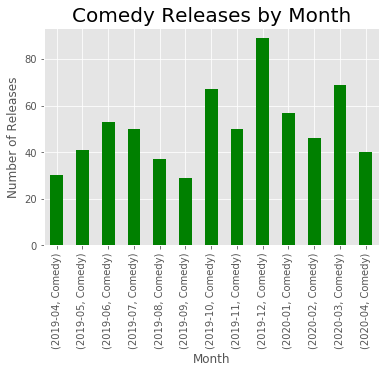

In [27]:
df_comedy = df_genres.loc[df_genres['genres'] == 'Comedy']
df_comedy.groupby('month_year')['genres'].value_counts().head(15).plot(kind='bar', color ='g')
plt.title('Comedy Releases by Month', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Releases')

Text(0, 0.5, 'Number of Releases')

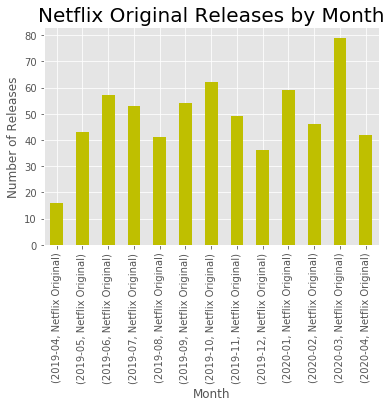

In [28]:
df_original = df.loc[df['Netflix_Original'] == 'Netflix Original']
df_original.groupby('month_year')['Netflix_Original'].value_counts().head(15).plot(kind='bar', color ='y')
plt.title('Netflix Original Releases by Month', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Releases')

Text(0, 0.5, 'Average IMDB Score')

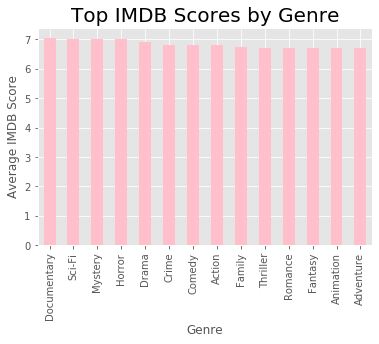

In [29]:
genres_df = df_genres.groupby('genres').filter(lambda x: x.shape[0] > 100)
genres_df.groupby('genres')['IMDB_score'].median().sort_values(ascending=False).head(15).plot.bar(color='pink')
plt.title('Top IMDB Scores by Genre', fontsize=20)
plt.xlabel('Genre')
plt.ylabel('Average IMDB Score')